# Lab 2, 5.02

<img src="https://imgs.xkcd.com/comics/exercise.png">

Python has a lot of life-saving (life simplifying?) features. 

This lab is about getting to know common tools to do stuff done quickly

## List + tuple

In [4]:
lists = [[]] * 3
lists

[[], [], []]

In [5]:
lists[0].append(3)
lists

[[3], [3], [3]]

In [6]:
lists = [[], [], []]
lists[0].append(3)
lists[1].append(5)
lists[2].append(7)
lists

[[3], [5], [7]]

In [7]:
tuples = tuple() 
tuples

()

## Slicing and indexing

In [14]:
word = "Hello"
word[0:2]

'He'

In [15]:
word[-1]

'o'

# Everything is a pointer

<img src="img/python_adressing.gif">

# Dict

In [12]:
print {'yellow': 2, 'blue': 3}
print dict(yellow=2, blue=3)
print dict({'yellow': 2, 'blue': 3})
print dict(zip(('yellow', 'blue'), (2, 3)))
print dict([['blue', 3], ['yellow', 2]])
print dict((('blue', 3), ('yellow', 2)))

{'blue': 3, 'yellow': 2}
{'blue': 3, 'yellow': 2}
{'blue': 3, 'yellow': 2}
{'blue': 3, 'yellow': 2}
{'blue': 3, 'yellow': 2}
{'blue': 3, 'yellow': 2}


In [13]:
m = {'yellow': 2, 'blue': 3}
m.items()

[('blue', 3), ('yellow', 2)]

# Ex. 1
a) Write function that takes a list and returns sum of elements in the list. Test it using following code:


Hint: If you don't remember syntax for functions you can refer to lecture slides

In [29]:
assert f([1,2,3]) == 16

NameError: name 'f' is not defined

# Ex. 2

* Use list and list indexing to simplify printing out tic-tac-toe board.
* Add storing board as a list of lists (``` board = [['', '', ''], ['','',''], ['','','']] ```)
* Wrap printing as a function ```print_board(board)```

In [30]:
print board([['', 'O', ''], ['','',''], ['','','X']])

NameError: name 'board' is not defined

# Numpy and matplotlib

Section adapted from https://github.com/jrjohansson/scientific-python-lectures

The numpy package (module) is used in almost all numerical computation using Python. 
It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.
To use numpy you need to import the module, using for example:

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

/Users/kudkudak/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

In [18]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2])

v

array([1, 2])

In [19]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

## Same interface as list

In [12]:
# v is a vector, and has only one dimension, taking one index
print v[0]

# M is a matrix, or a 2 dimensional array, taking two indices 
print M[1,1]

1
4


So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [32]:
# What is M?
print M.dtype
print M.shape

int64
(2, 2)


In [31]:
# What has happened here?
print M[0] + v
# Every operation like this is executed using fast C/Fortran code!
print np.dot(M, M)

[2 4]
[[ 7 10]
 [15 22]]


In [26]:
# There is all sort of things you can do with numpy array
dir(v)

# For instance:
print "Sum:", v.sum()
print "Avg:", v.mean()

Sum: 3
Avg: 1.5


## Random module

In [53]:
print np.random.uniform(0, 1)

0.577476027676


In [60]:
print np.random.choice(10)

8


In [62]:
# Selecting random elemn
L = [[1,1], [1,2]]
print L[np.random.choice(len(L))]

[1, 1]


# Ex 3

Solve a set of linear equations

$3x + 2y = 4$

$1x + 10y = 2$

Using numpy

Hint:
* Initialize matrix A and b
* Use np.linalg.inv
* Use np.dot, "*" is not multiplying matrices correctly

# Matplotlib

Section adapted from https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

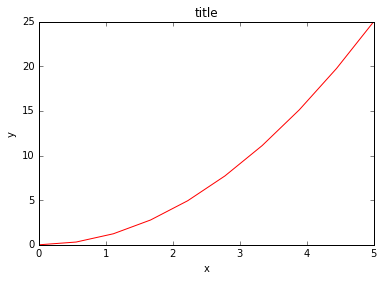

In [27]:
x = np.linspace(0, 5, 10)
y = x ** 2

plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

(array([ 22.,  27.,  23.,  16.,  31.,  19.,  20.,  19.,  12.,  11.]),
 array([ 0.0052952 ,  0.1024081 ,  0.19952101,  0.29663391,  0.39374682,
         0.49085972,  0.58797263,  0.68508553,  0.78219844,  0.87931134,
         0.97642425]),
 <a list of 10 Patch objects>)

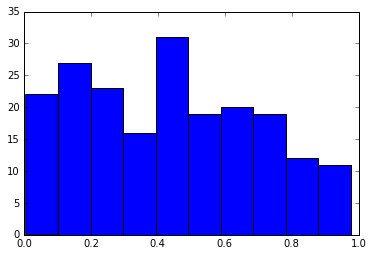

In [28]:
x = np.random.uniform(0, 1, 200)
plt.hist(x)

# Ex 4. (Coin simulation)

A lot of data analysis can be conducted in bayesian framework. In such framework we postulate parametrized model and then find parameters that best explain data.

Once we have those parameters we can do multiple things, one is assesing correctness of some hypothesis.

In this exercise you will just postulate model and simulate its outcome for given variables.

## Problem

We have a coin from factory that produces biased coins. Repeat 10000 times:

1. Assign $\theta$ using beta distribution (https://en.wikipedia.org/wiki/Beta_distribution) with a=10, b=10, by ```theta=np.random.beta(a=10, b=10)```

2. Run 1000 trials using ```np.random.binomial(n, theta)```

Then:

3. Plot histogram of results (result is a list of 100000 numbers)

4. Plot histogram of results for a=10, b=30. What has changed?

(array([  25.,  148.,  298.,  279.,  165.,   52.,   29.,    2.,    1.,    1.]),
 array([ 0.02217915,  0.04369789,  0.06521663,  0.08673537,  0.10825411,
         0.12977285,  0.15129159,  0.17281033,  0.19432907,  0.21584781,
         0.23736655]),
 <a list of 10 Patch objects>)

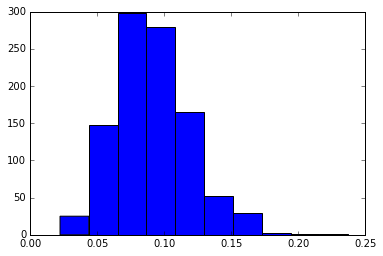

In [49]:
plt.hist(np.random.beta(10, 100, 1000)) # Beta distribution for bias of the coin

# Ex 5. (Tic-tac-toe improvements, cntd.)

* Rewrite it to use numpy (store as 0 '', 1 for 'X', -1 for 'O')
* Write function play_at(board, player, x, y) that returns modified board (use .copy())
    * Throw an error if it cannot be done
* Write function score(board) which returns winning player

In [35]:
board = np.zeros(shape=(3,3)) # np.zeros is awesome
board_2 = play_at(board, 'X', 0, 0)
assert board != board_2, "Copied correctly"
assert board_2[0,0] == 'X', "Played correctly"

board_3 = play_at(play_at(play_at(board, 'X', 0, 0), 'X', 0, 1), 'X', 0, 2)
assert score(board_3) == 1, "Correctly scores"

play_at(board_2, 'X', 0, 0) # This should throw an error

NameError: name 'play_at' is not defined

# Ex 6. (Random playout in tic-tac-toe), 2 points

Cornerstone of any AI is brute force, in one way or another. We start this by implementing playout

Implement playout_random(board, current_player) which will playout randomly board and return it.

Hint: here is a structure reusing previous code


In [63]:
while score(board) == 0:
    possible_moves = # fill in a list of lists of 2
    number_of_choices = len(possible_choices)
    choice = np.random.choice(number_of_choices) 
    move = possible_moves[choice]
    board = play_at(board, current_player, move[0], move[1])
    current_player = # swap player
return board

SyntaxError: invalid syntax (<ipython-input-63-d0c781e95546>, line 2)